<a href="https://colab.research.google.com/github/riyadfirdaus/Prolog/blob/master/Copy_of_Projek_Daming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
uploaded = files.upload()

Saving fetal_health.csv to fetal_health.csv


In [7]:
df = pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
duplikasi = df.duplicated()
duplikasi.value_counts()

False    2113
True       13
dtype: int64

In [10]:
df = df.drop_duplicates()

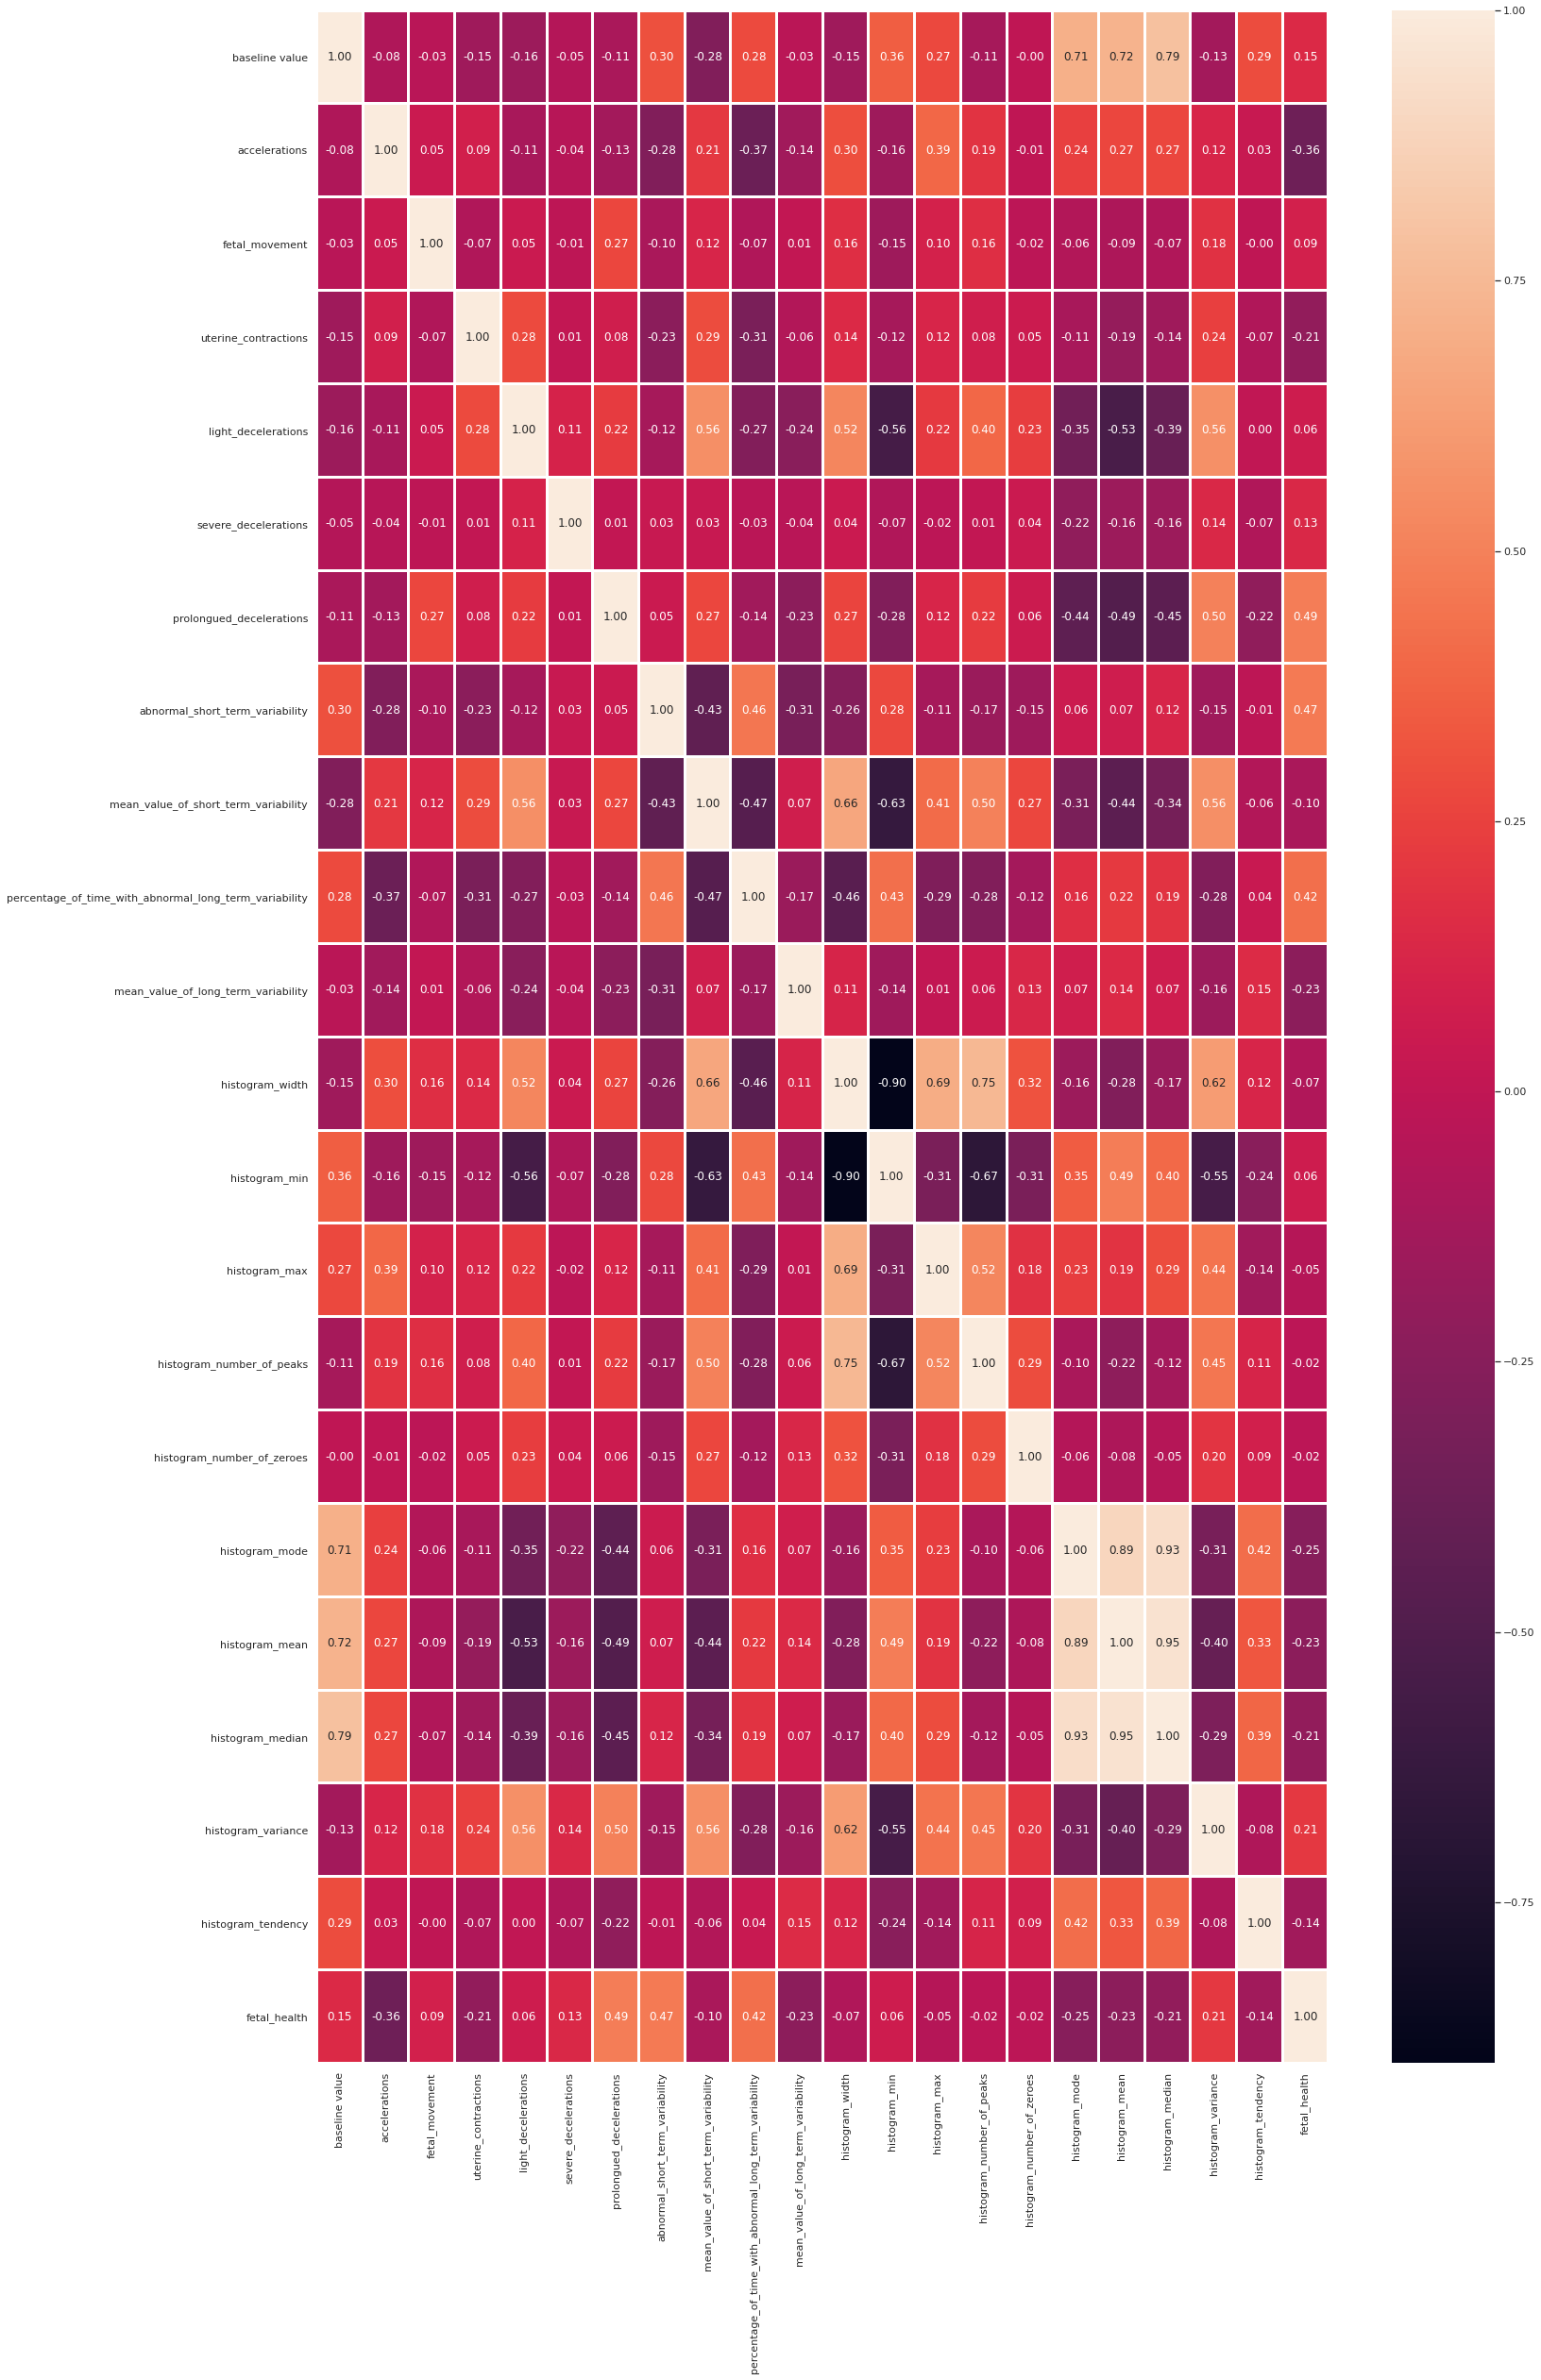

In [11]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24,40)})
sns.heatmap(df.corr(), annot = True, fmt='.2f', linewidth = 2)

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,8.166635,70.535258,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,5.632912,39.007706,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,68.000000,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [12]:
df['fetal_health'] = df['fetal_health'].map({1:'Normal', 2:'Suspect', 3:'Pathological'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
def displot(features):
  fig = plt.figure(figsize=(10,6))
  sns.displot(data=df, x=df[features], hue="fetal_health", kind="kde")
  plt.show()

<Figure size 720x432 with 0 Axes>

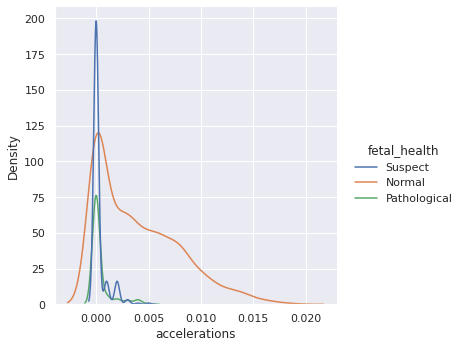

<Figure size 720x432 with 0 Axes>

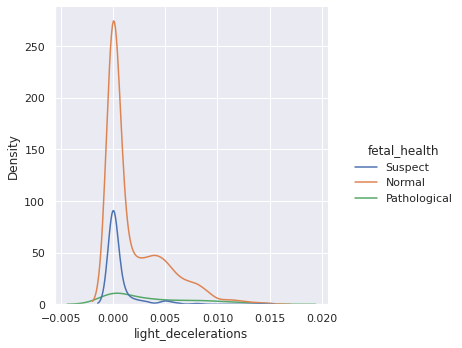

<Figure size 720x432 with 0 Axes>

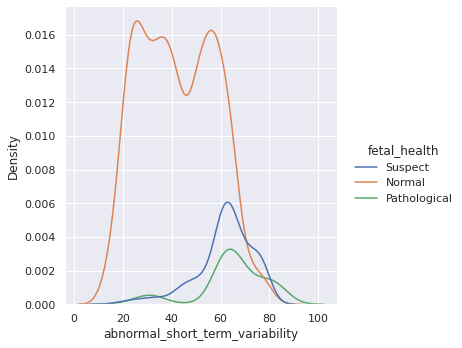

<Figure size 720x432 with 0 Axes>

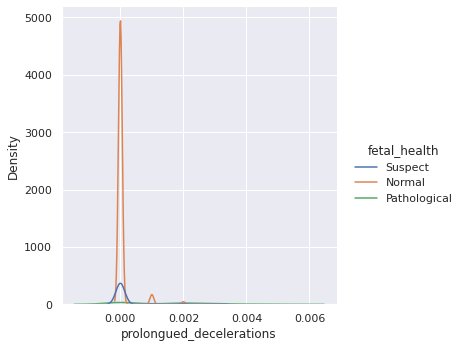

In [14]:
for feature in ['accelerations', 'light_decelerations', 'abnormal_short_term_variability', 'prolongued_decelerations']:
    displot(feature)

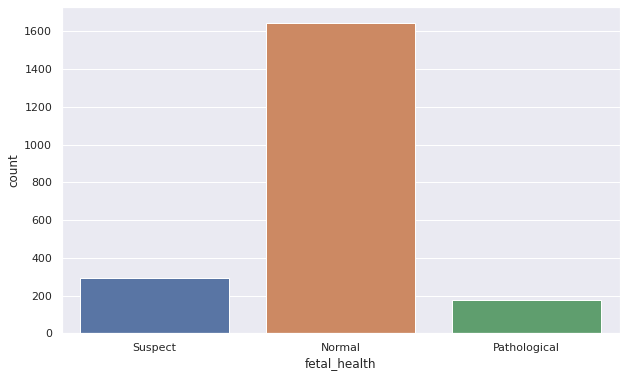

In [15]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="fetal_health",data = df)

In [16]:
import plotly.express as px

plot_data = df.groupby('fetal_health')['fetal_health'].agg(['count']).reset_index()

fig = px.pie(plot_data, values = plot_data['count'], names = plot_data['fetal_health'])
fig.show()

Random Over Sampling

In [17]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score

X = df.drop(['fetal_health'],axis = 1)
y = df['fetal_health']

Counter(y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



Counter({'Normal': 1646, 'Pathological': 175, 'Suspect': 292})

In [18]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution 
print(Counter(y_ros))

Counter({'Suspect': 1646, 'Normal': 1646, 'Pathological': 1646})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



**Decision Tree**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size = 0.2,random_state=21)

from sklearn import tree

# membuat model dengan decision tree ckassifier
clf = tree.DecisionTreeClassifier()
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 20)}
grid_search = GridSearchCV(clf, param_grid)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 17}
0.9820253164556962


In [33]:
clf = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 19)

clf.fit(X_train,y_train)

pred_decisionrosTrain = clf.predict(X_train)
f1_score(y_train,pred_decisionrosTrain,average='macro')

0.9997481419761834

In [34]:
confusion_matrix(y_train,pred_decisionrosTrain)

array([[1321,    0,    1],
       [   0, 1303,    0],
       [   0,    0, 1325]])

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr')

0.9999991369810691

In [36]:
pred_decisionrosTest = clf.predict(X_test)
f1_score(y_test,pred_decisionrosTest,average='macro')

0.989683969160183

In [37]:
confusion_matrix(y_test,pred_decisionrosTest)

array([[315,   1,   8],
       [  0, 343,   0],
       [  1,   0, 320]])

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

0.9915489730066934

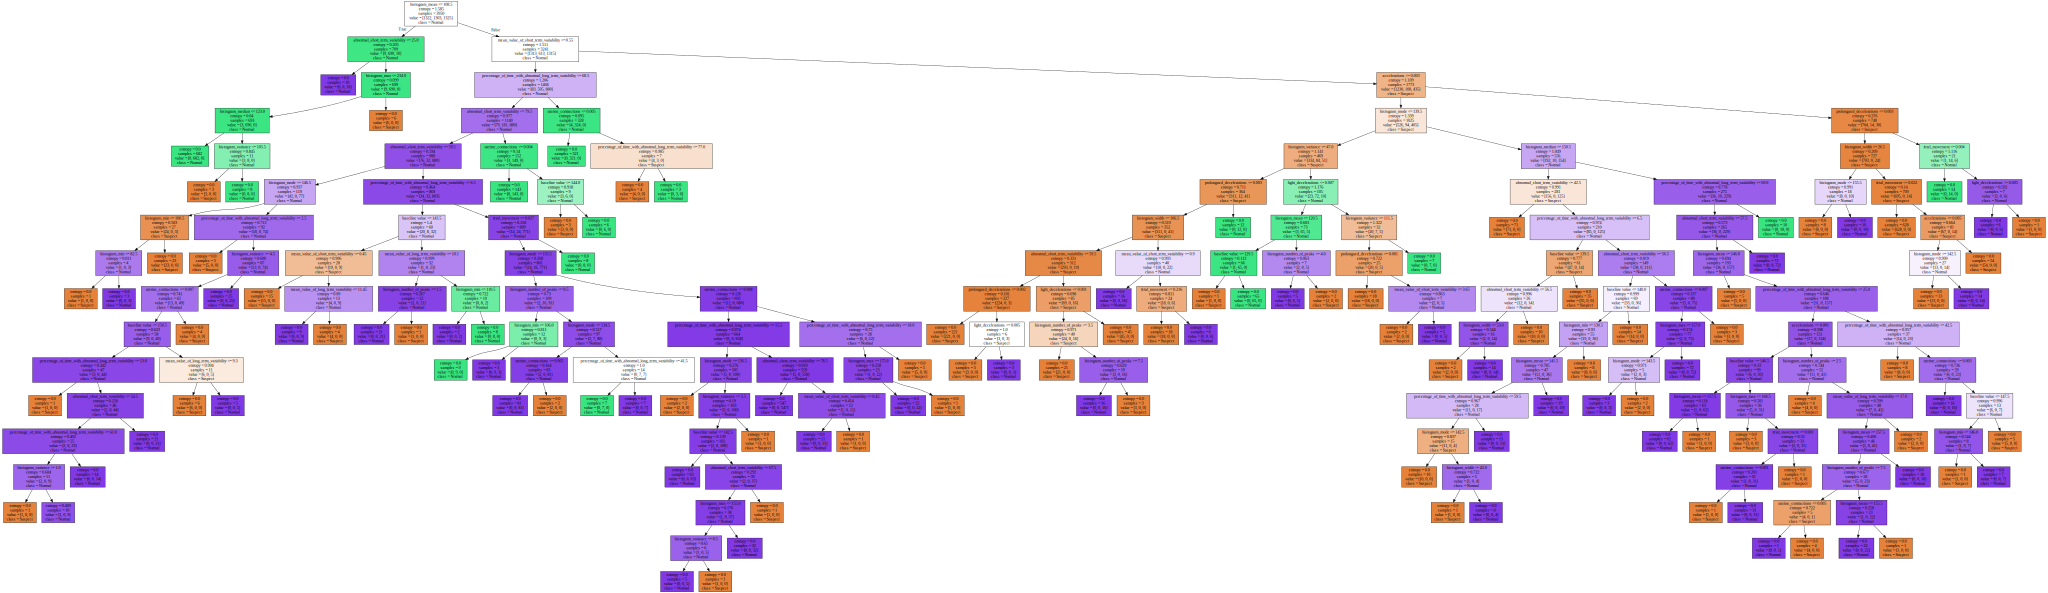

In [23]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=y,
                                filled=True) 
graph = graphviz.Source(dot_data)
graph

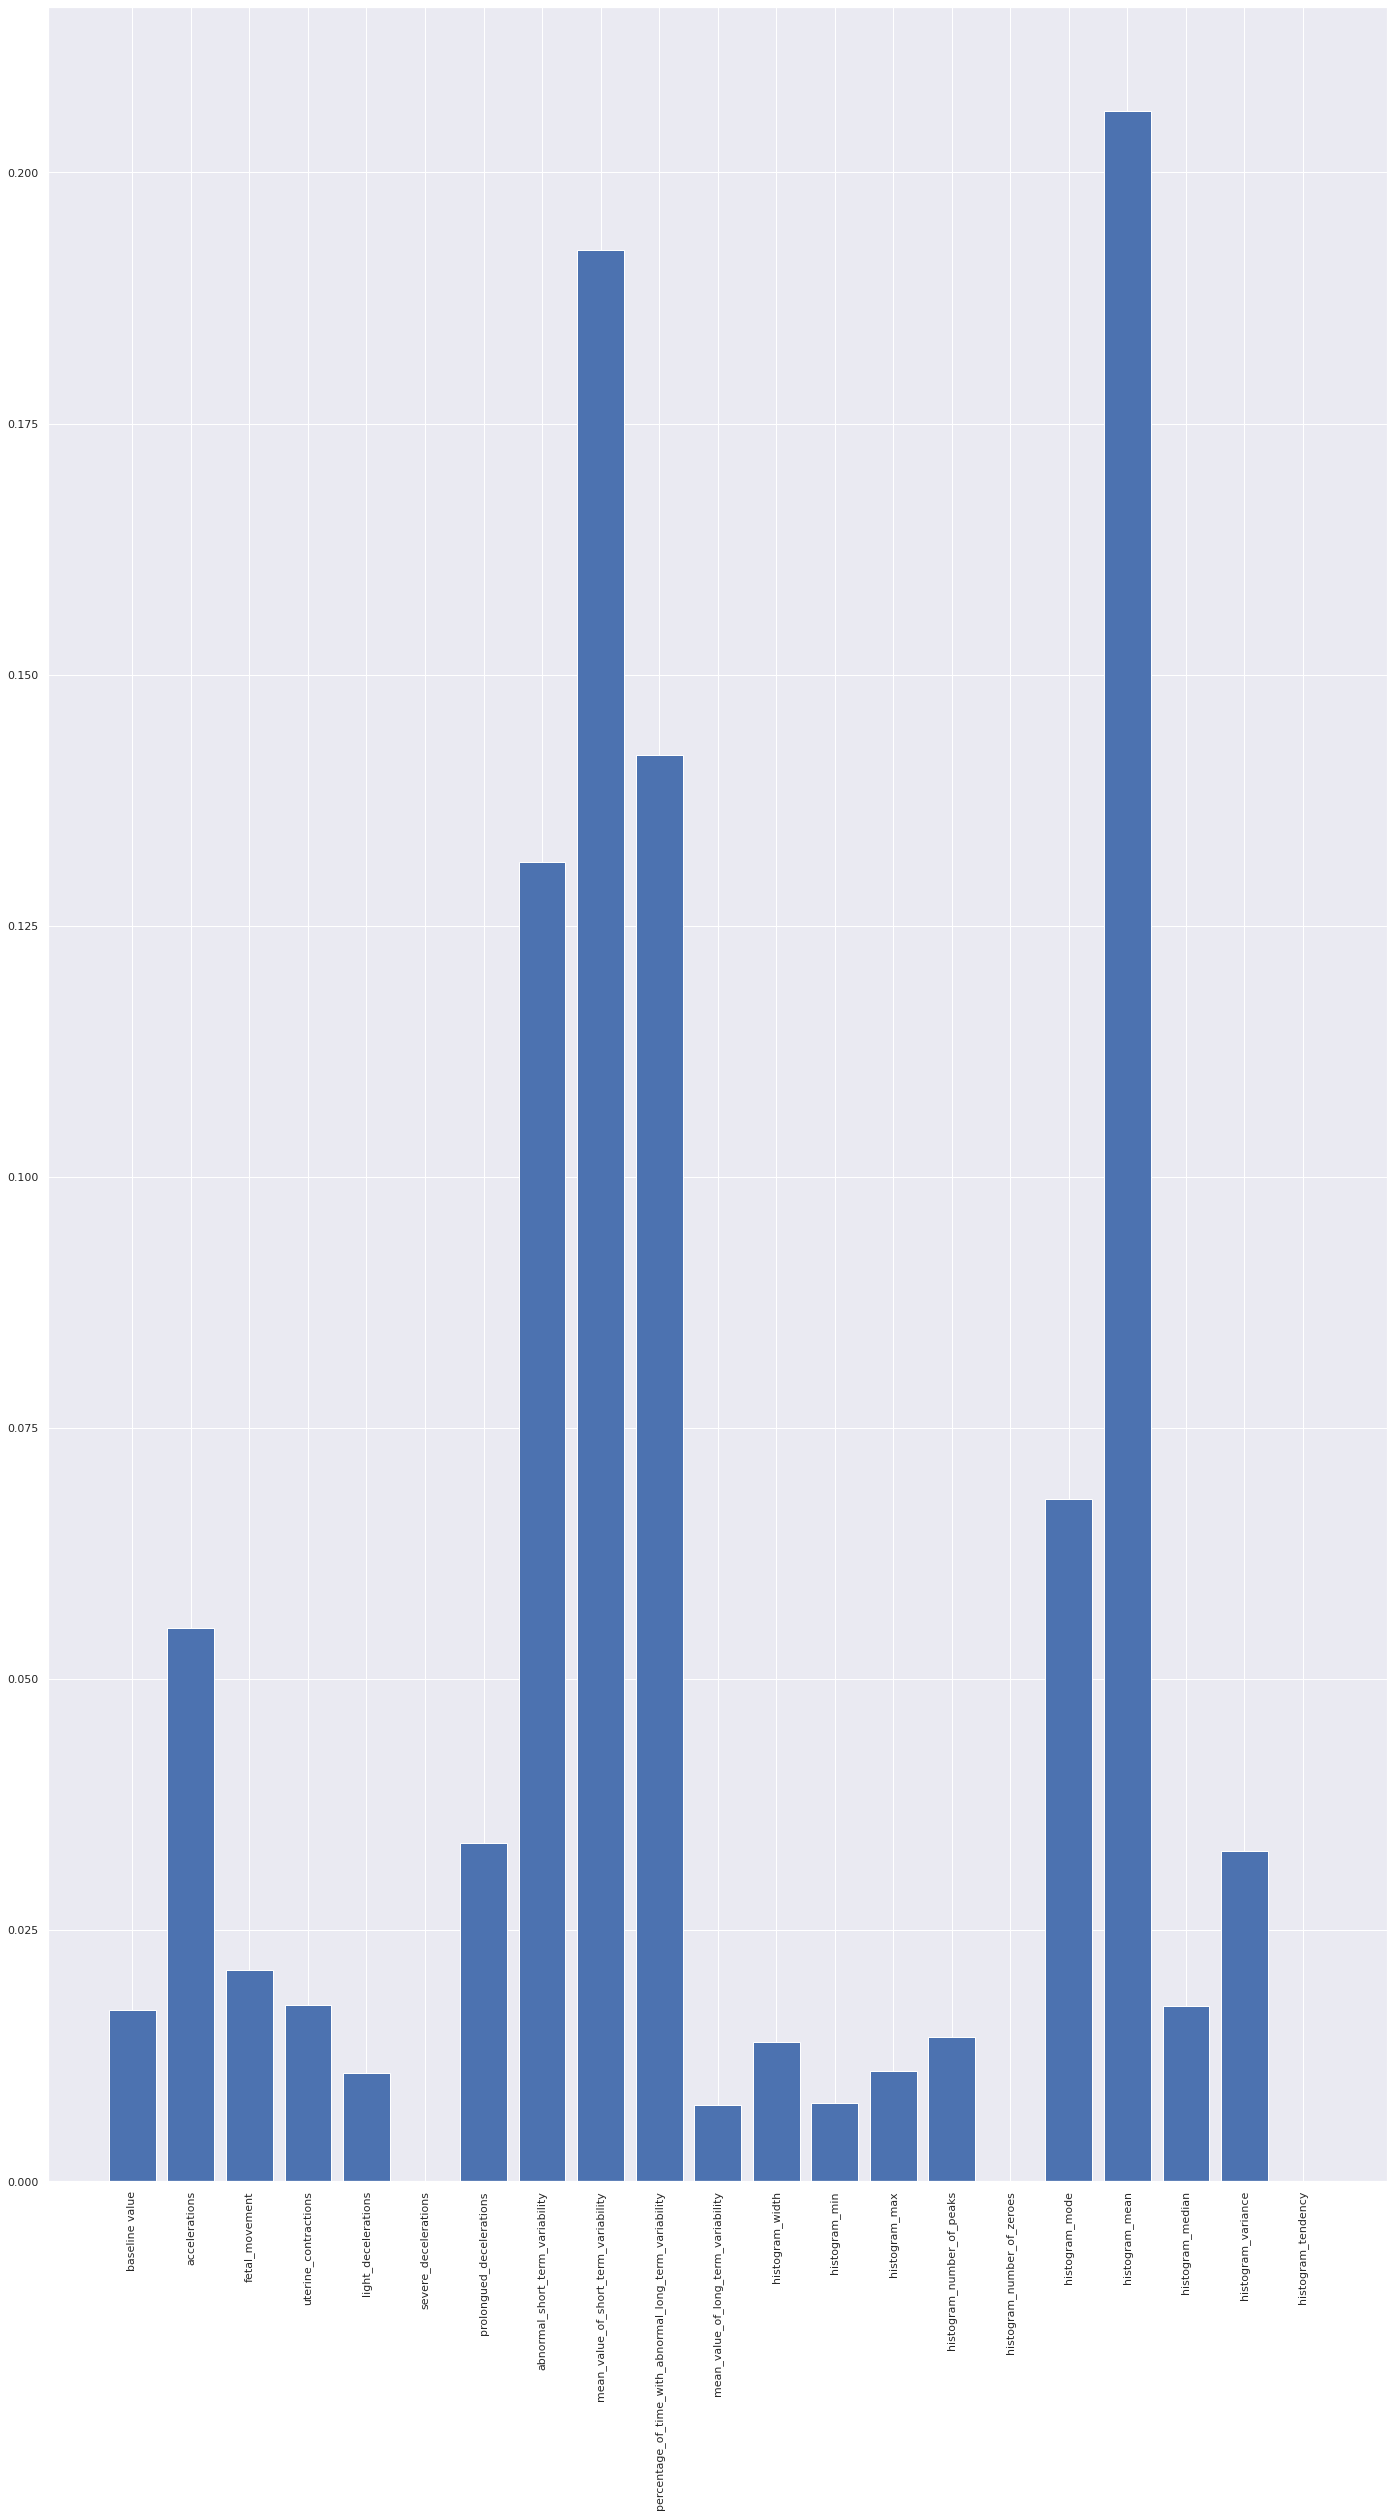

In [24]:
fig, ax = plt.subplots()
ax.bar(X.columns, clf.feature_importances_)
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

Confusion matrix, without normalization
[[315   1   8]
 [  0 343   0]
 [  1   0 320]]
Normalized confusion matrix
[[0.97 0.   0.02]
 [0.   1.   0.  ]
 [0.   0.   1.  ]]


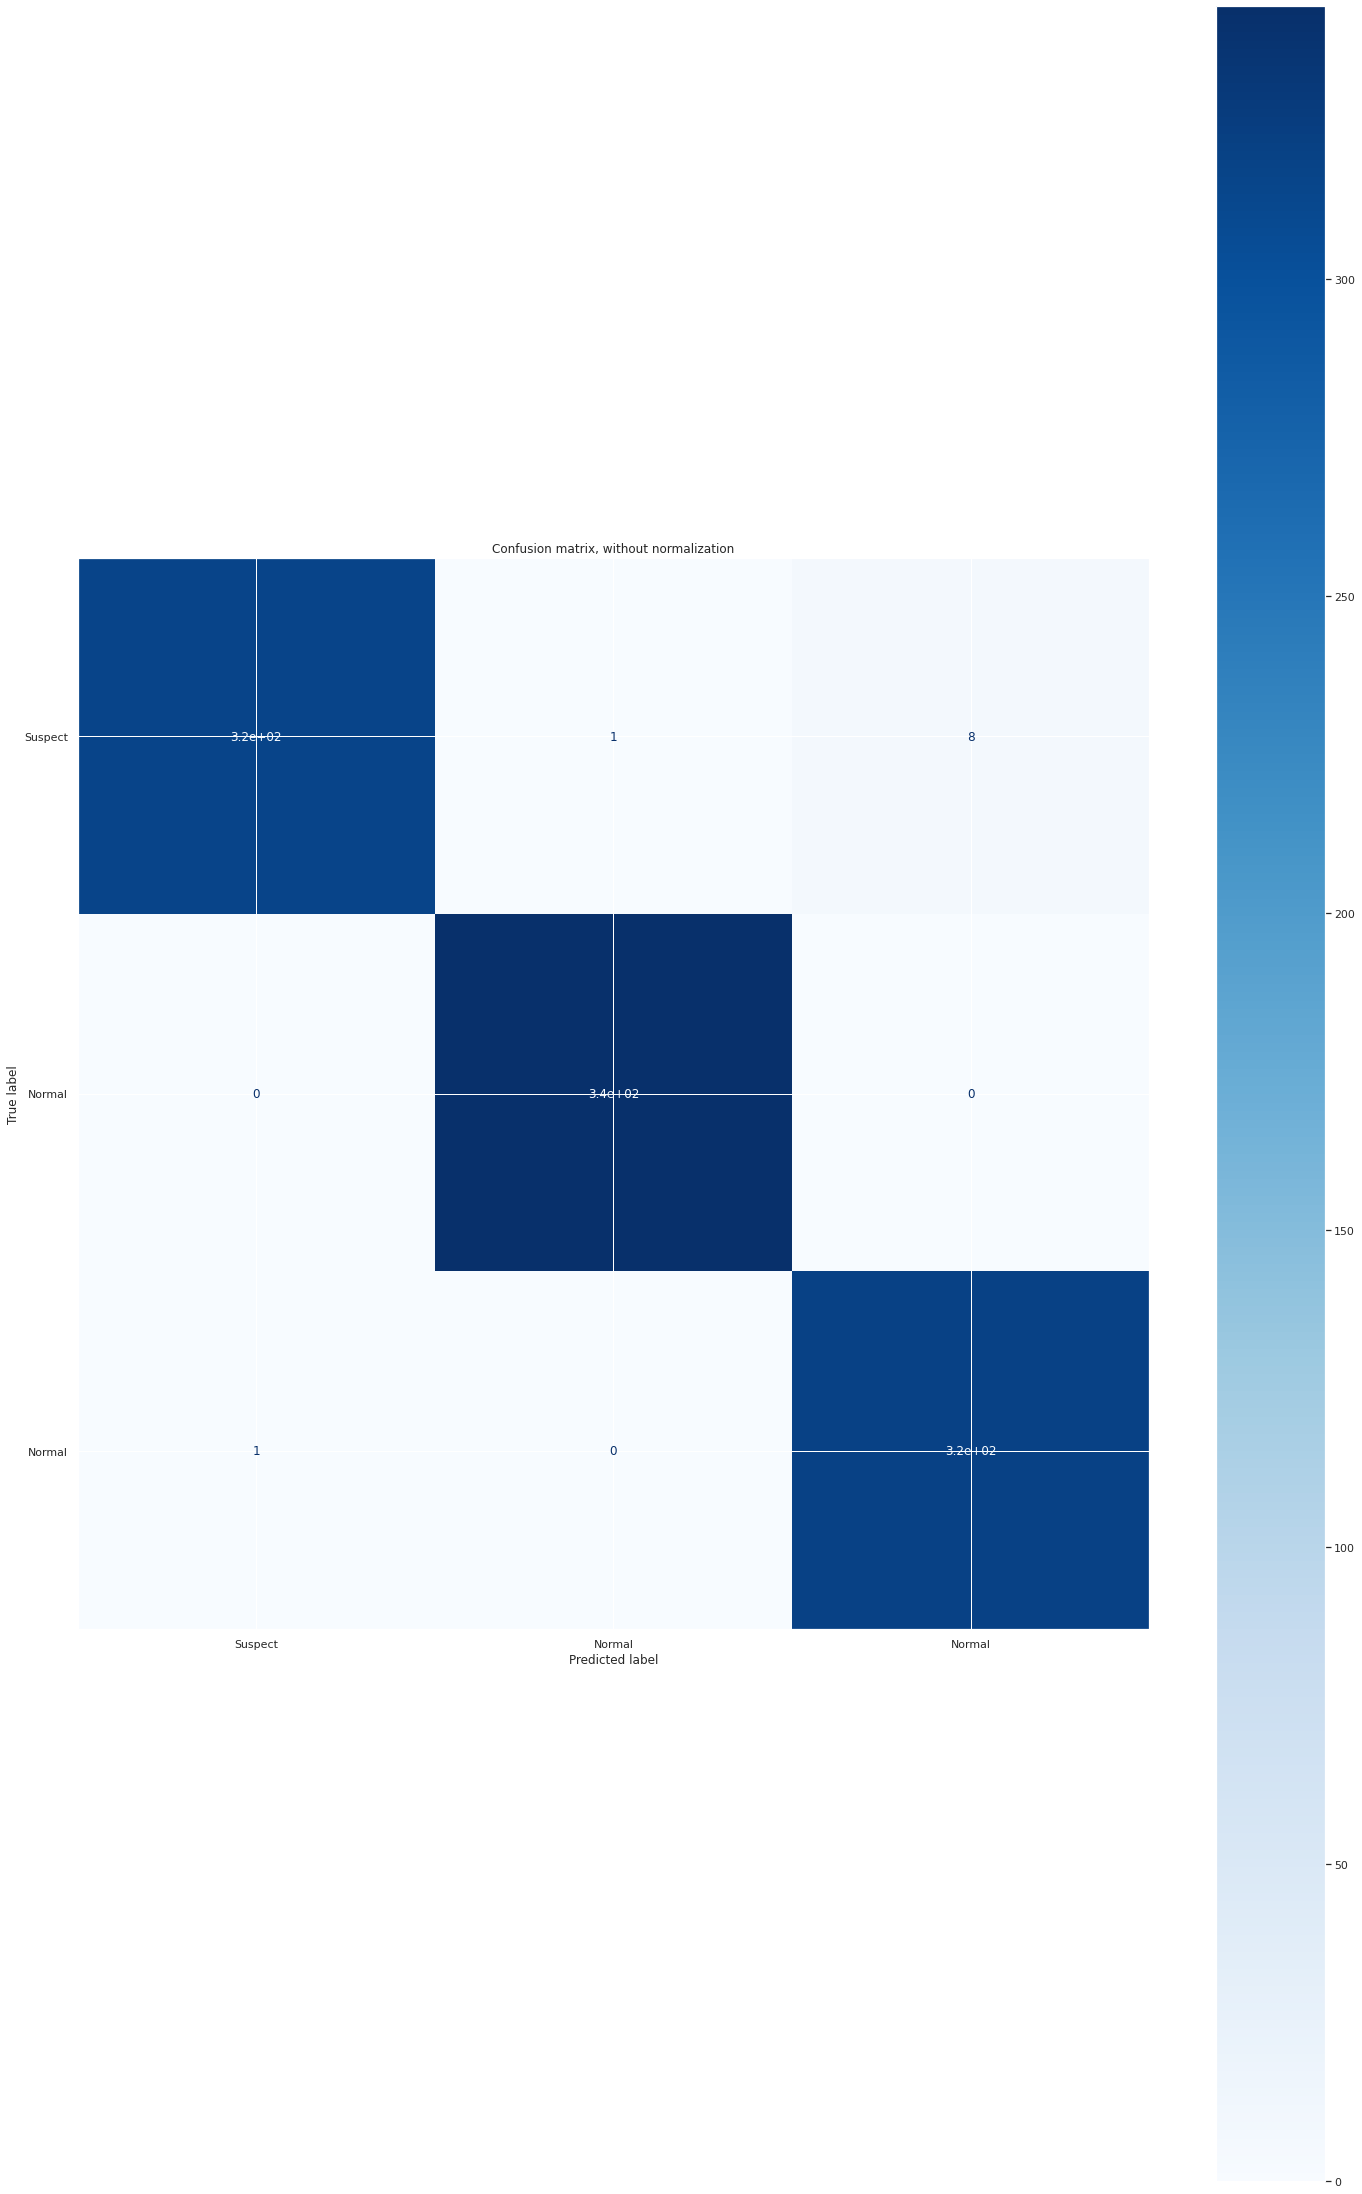

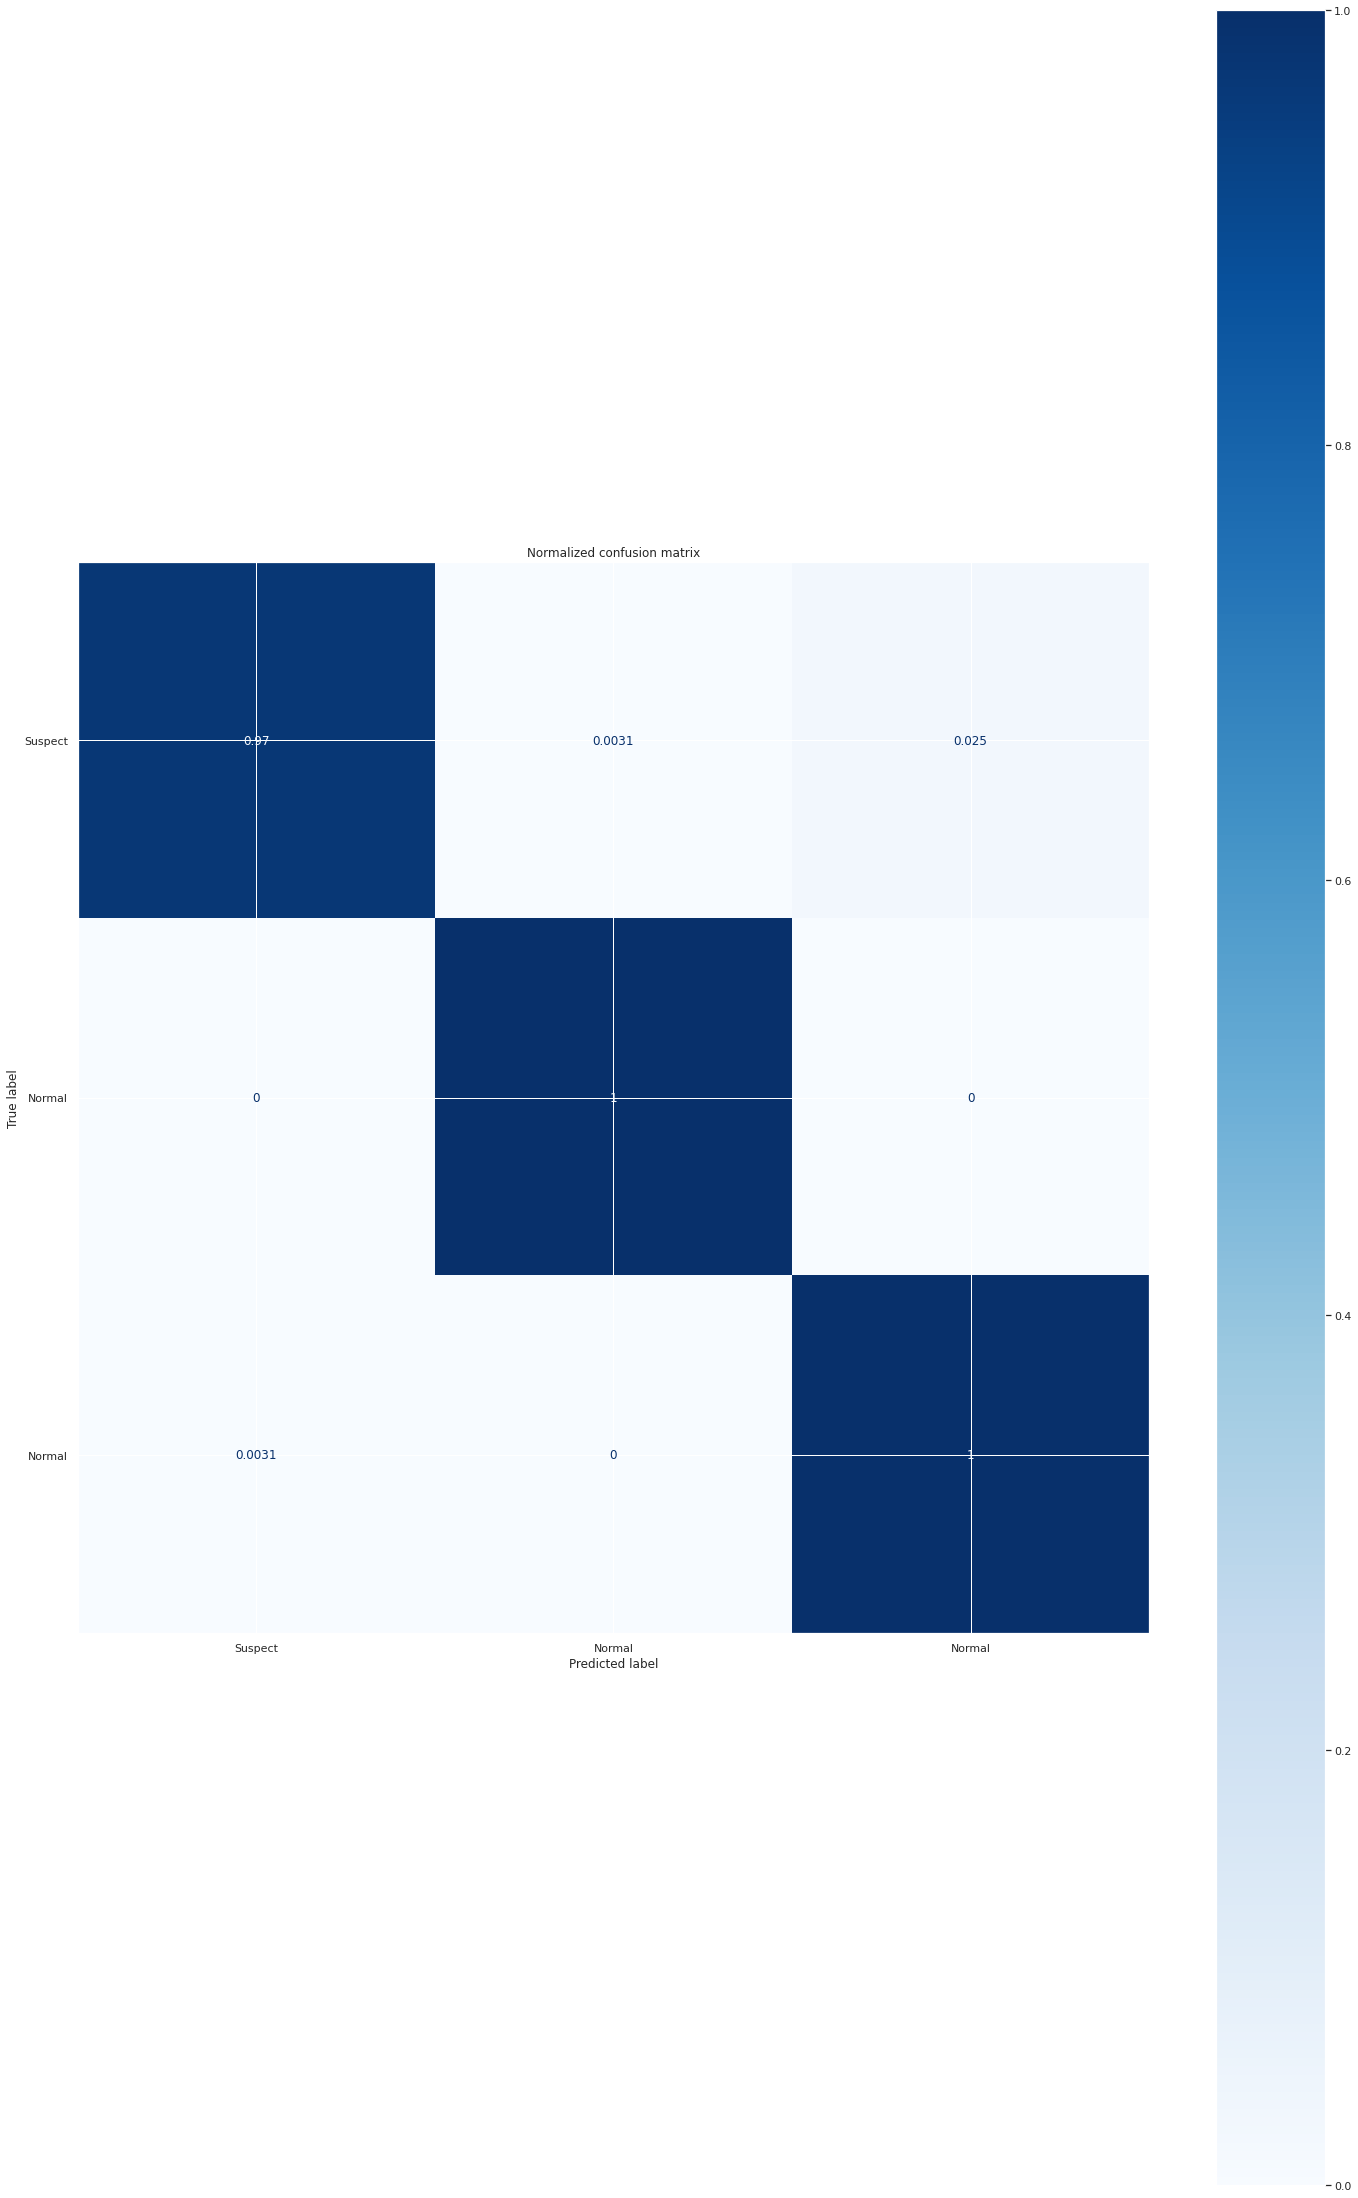

In [41]:
np.set_printoptions(precision=2)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**SVM**

In [ ]:
#svm
from sklearn import svm

clf = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid_search = GridSearchCV(clf, param_grid)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9878481012658227


In [ ]:
clf = svm.SVC(C= 1, gamma= 1, kernel= 'rbf')

clf.fit(X_train, y_train)

pred_SVMrosTrain = clf.predict(X_train)
f1_score(y_train,pred_SVMrosTrain,average='macro')

0.9997481419761834

In [ ]:
confusion_matrix(y_train,pred_SVMrosTrain)

array([[1321,    0,    1],
       [   0, 1303,    0],
       [   0,    0, 1325]])

In [ ]:
pred_SVMrosTest = clf.predict(X_test)
f1_score(y_test,pred_SVMrosTest,average='macro')

0.9886265542306573

In [ ]:
confusion_matrix(y_test,pred_SVMrosTest)

array([[323,   0,   1],
       [  0, 343,   0],
       [ 10,   0, 311]])

**XGB**

In [ ]:
from xgboost import XGBClassifier
 
#model XGB
XGB_model = XGBClassifier()
param = {'reg_alpha': [1.1, 1.2, 1.3],
        'reg_lambda': [1.1, 1.2, 1.3],
        'colsample_bytree': [0.7, 0.8],
        'subsample': [0.7, 0.8, 0.9]}
grid_search = GridSearchCV(XGB_model, param)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'colsample_bytree': 0.8, 'reg_alpha': 1.1, 'reg_lambda': 1.2, 'subsample': 0.9}
0.9648101265822785


In [ ]:
XGB_model = XGBClassifier(colsample_bytree= 0.8, reg_alpha= 1.1, reg_lambda= 1.2, subsample= 0.9)
XGB_model.fit(X_train,y_train)
pred_xgb = XGB_model.predict(X_train)
f1_score(y_train,pred_xgb,average="macro")

0.9735456593409647

In [ ]:
confusion_matrix(y_train,pred_xgb)

array([[1247,    6,   69],
       [   0, 1291,   12],
       [  18,    0, 1307]])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, XGB_model.predict_proba(X_train), multi_class='ovr')

0.9986345302438465

In [ ]:
pred_xgb = XGB_model.predict(X_test)
f1_score(y_test,pred_xgb,average="macro")

0.9682826262787138

In [ ]:
confusion_matrix(y_test,pred_xgb)

array([[308,   1,  15],
       [  0, 337,   6],
       [  9,   0, 312]])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, XGB_model.predict_proba(X_test), multi_class='ovr')

0.9969327958029376

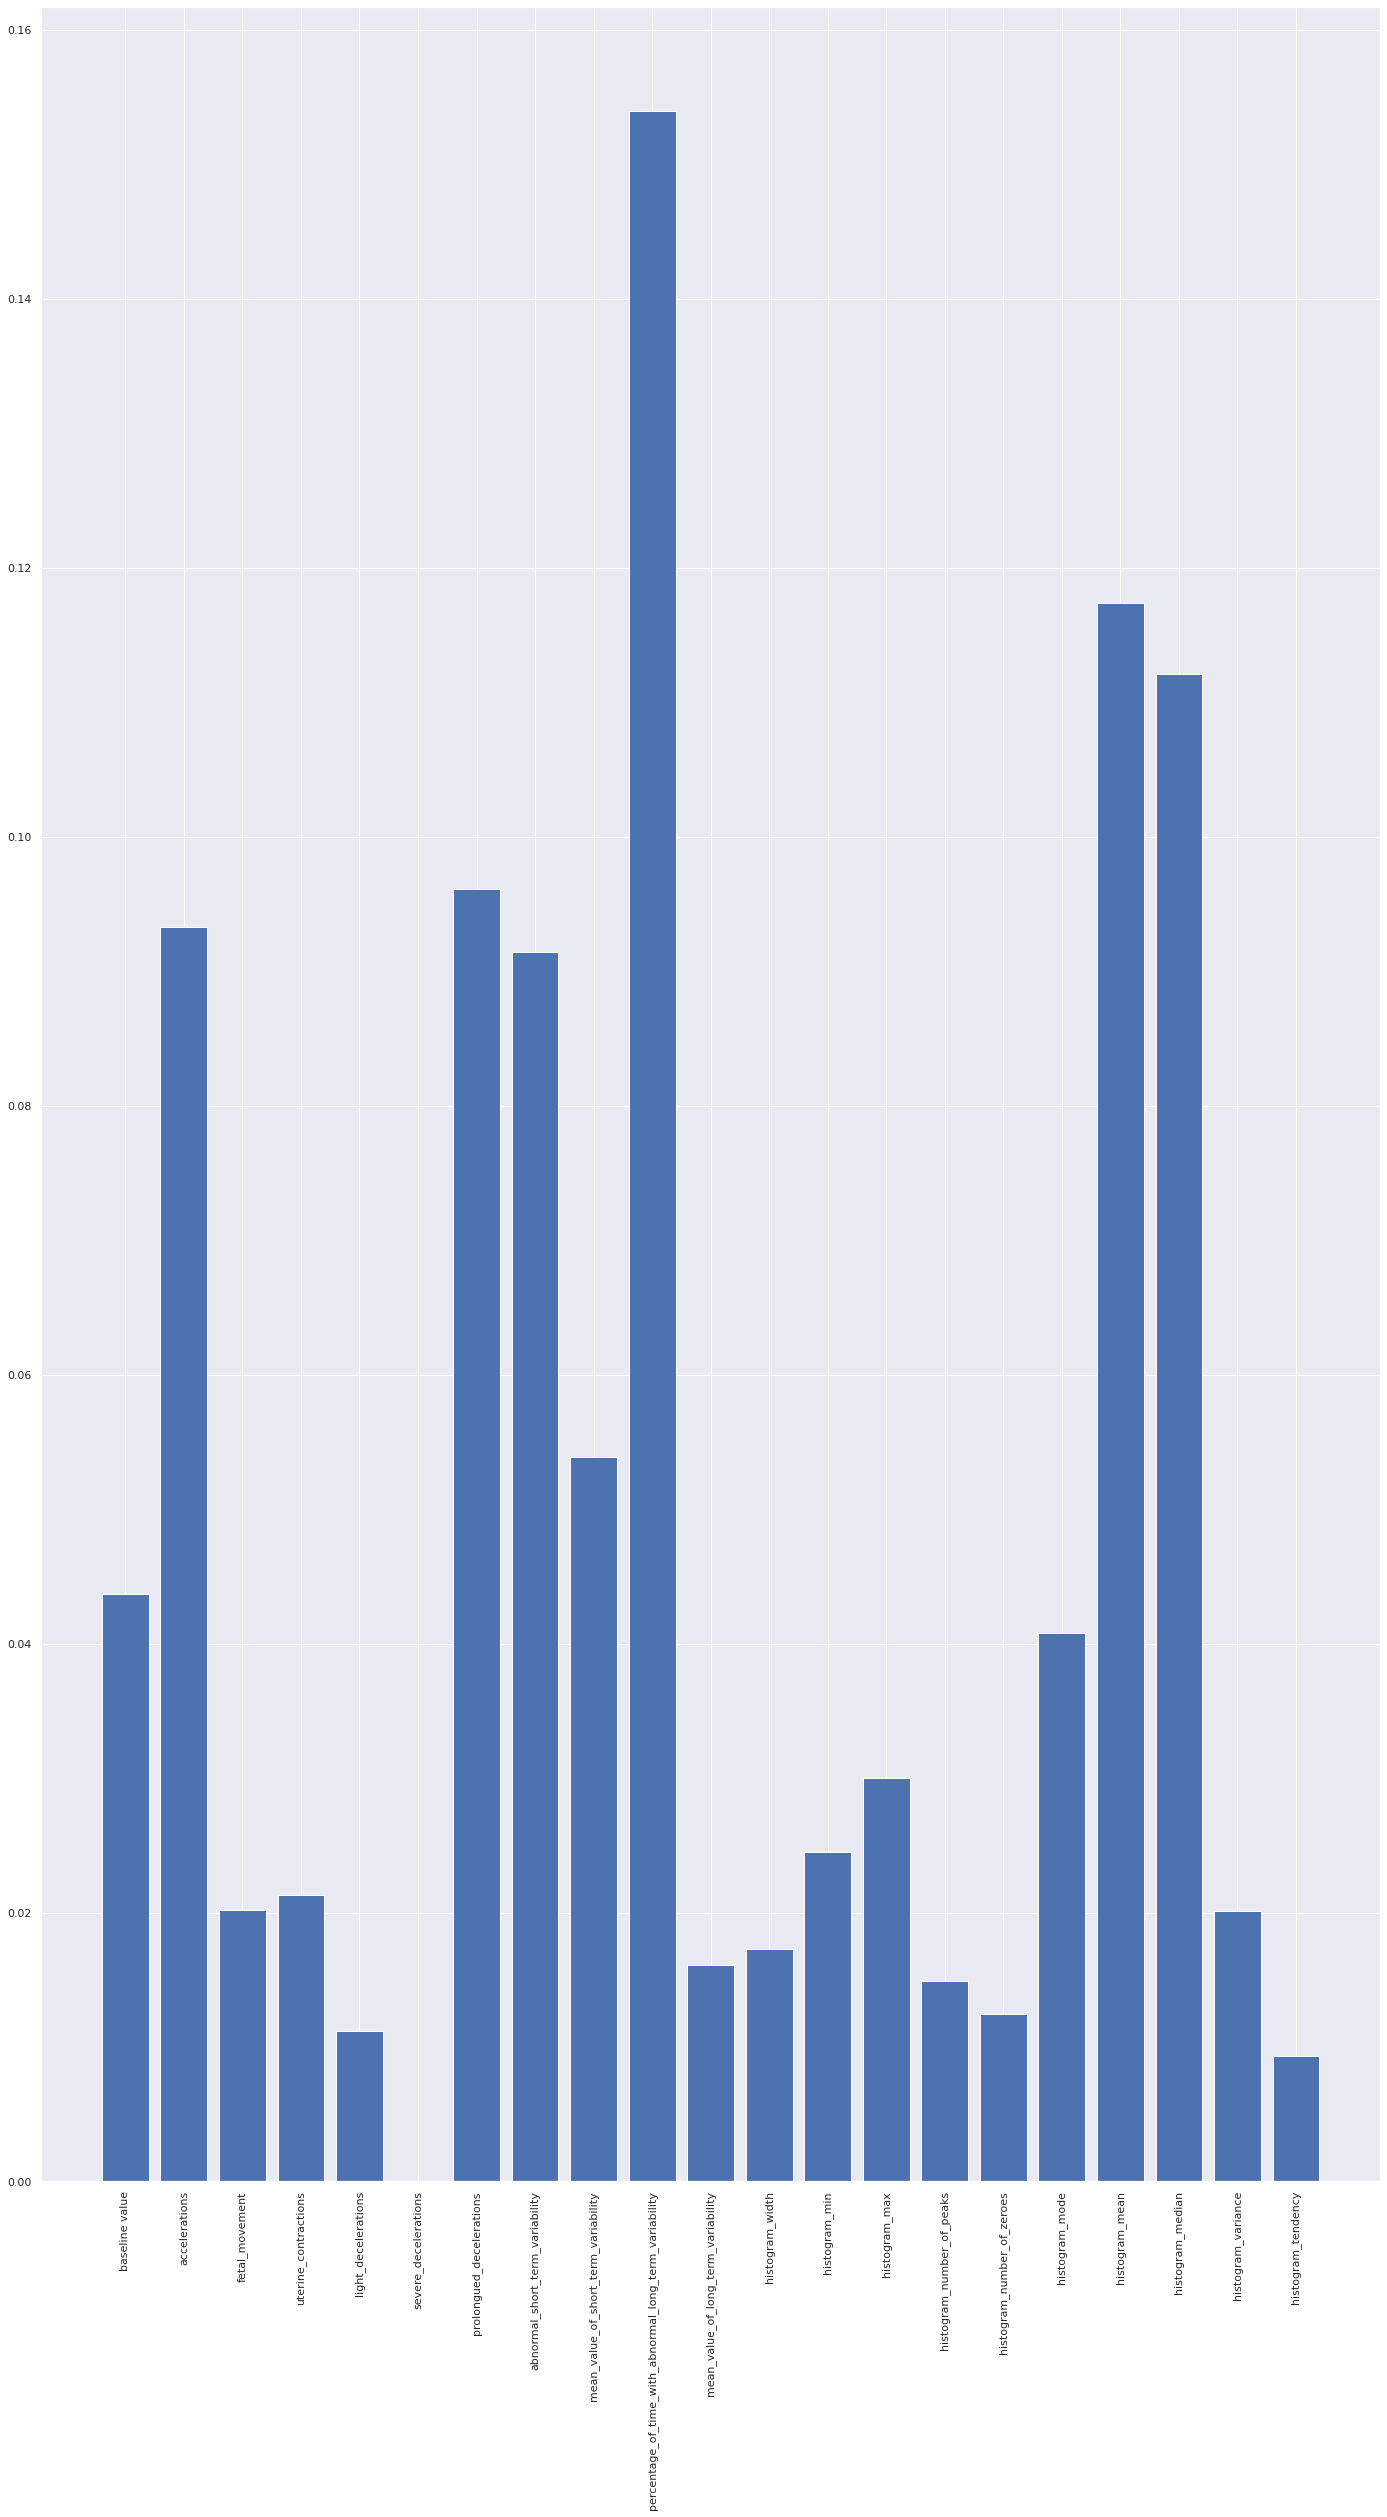

In [ ]:
fig, ax = plt.subplots()
ax.bar(X.columns, XGB_model.feature_importances_)
ax.set_xticklabels(X.columns, rotation=90)
plt.show()

Random UnderSampling

In [ ]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)

# new class distribution
print(Counter(y_rus))

Counter({'Normal': 175, 'Pathological': 175, 'Suspect': 175})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
from sklearn import tree

# membuat model dengan decision tree ckassifier
clf = tree.DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_rus,y_rus,test_size = 0.2,random_state=21)

clf.fit(X_train,y_train)

pred_decisionrosTrain = clf.predict(X_train)
f1_score(y_train,pred_decisionrosTrain,average='macro')

1.0

In [ ]:
confusion_matrix(y_train,pred_decisionrosTrain)

array([[134,   0,   0],
       [  0, 136,   0],
       [  0,   0, 150]])

In [ ]:
pred_decisionrosTest = clf.predict(X_test)
f1_score(y_test,pred_decisionrosTest,average='macro')

0.8273889852837222

In [ ]:
confusion_matrix(y_test,pred_decisionrosTest)

array([[32,  1,  8],
       [ 0, 36,  3],
       [ 5,  0, 20]])

In [ ]:
#svm
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

pred_SVMrosTrain = clf.predict(X_train)
f1_score(y_train,pred_SVMrosTrain,average='macro')

0.8142062259162631

In [ ]:
confusion_matrix(y_train,pred_SVMrosTrain)

array([[111,   6,  17],
       [  3, 109,  24],
       [ 21,   8, 121]])

In [ ]:
pred_SVMrosTest = clf.predict(X_test)
f1_score(y_test,pred_SVMrosTest,average='macro')

0.7635413151460254

In [ ]:
confusion_matrix(y_test,pred_SVMrosTest)

array([[33,  2,  6],
       [ 1, 28, 10],
       [ 3,  2, 20]])

In [ ]:
from xgboost import XGBClassifier
 
#model XGB
XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train)
pred_xgb = XGB_model.predict(X_train)
f1_score(y_train,pred_xgb,average="macro")

0.9906104378819359

In [ ]:
confusion_matrix(y_train,pred_xgb)

array([[131,   0,   3],
       [  0, 135,   1],
       [  0,   0, 150]])

In [ ]:
pred_xgb = XGB_model.predict(X_test)
f1_score(y_test,pred_xgb,average="macro")

0.8964265294453974

In [ ]:
confusion_matrix(y_test,pred_xgb)

array([[35,  1,  5],
       [ 0, 38,  1],
       [ 1,  2, 22]])